In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
import os
import sys
sys.path.append(r'c:\Users\M1SRH\Documents\Spyder_Projects\BioFormatsRead')
import bfimage as bf

# specify where to find the bioformats_package.jar - modify path to your needs
bfpath = r'c:\Users\M1SRH\Documents\Software\BioFormats_Package\5.1.8\bioformats_package.jar'
bf.set_bfpath(bfpath)

'c:\\Users\\M1SRH\\Documents\\Software\\BioFormats_Package\\5.1.8\\bioformats_package.jar'

In [2]:
# define the file
filename = r'c:\Users\M1SRH\Documents\Spyder_Projects\BioFormatsRead\testdata\Beads_63X_NA1.35_xy=0.042_z=0.1.czi'

imgbase = os.path.basename(filename)
imgdir = os.path.dirname(filename)

In [3]:
# get image meta-information
MetaInfo = bf.bftools.get_relevant_metainfo_wrapper(filename)

seriesID = 0
timepoint = 0
channel = 0

# get the actual z-stack from the data set
zstack = bf.bftools.get_zstack(filename, MetaInfo['Sizes'], seriesID, timepoint)
# get plane with the brightest pixel
zplane = (zstack == zstack.max()).nonzero()[0][0]

T:  1 Z:  100 C:  1 X:  580 Y:  346
Using czifile.py to get CZI Shape info.
Using BioFormats to get MetaInfo.
Try to read objective name via czifile.py


In [4]:
# show relevant image Meta-Information
print 'Image Directory      : ', imgdir
print 'Image Filename       : ', imgbase
print 'Images Dim Sizes     : ', MetaInfo['Sizes']
print 'Dimension Order BF   : ', MetaInfo['DimOrder BF']
print 'Dimension Order CZI  : ', MetaInfo['OrderCZI']
print 'Total Series Number  : ', MetaInfo['TotalSeries']
print 'Image Dimensions     : ', MetaInfo['TotalSeries'], MetaInfo['SizeT'], MetaInfo['SizeZ'], MetaInfo['SizeC'],\
                                    MetaInfo['SizeY'], MetaInfo['SizeX']
print 'Scaling XYZ [micron] : ', MetaInfo['XScale'], MetaInfo['YScale'], MetaInfo['ZScale']
print 'Objective M-NA-Imm   : ', MetaInfo['ObjMag'], MetaInfo['NA'], MetaInfo['Immersion']
print 'Objective Name       : ', MetaInfo['ObjModel']
print 'Detector Name        : ', MetaInfo['DetName']
print 'Ex. Wavelengths [nm] : ', MetaInfo['WLEx']
print 'Em. Wavelengths [nm] : ', MetaInfo['WLEm']
print 'Dyes                 : ', MetaInfo['Dyes']
print 'Channel Description  : ', MetaInfo['ChDesc']
print '============================================================='
print 'Shape Z-Stack        : ', np.shape(zstack)

Image Directory      :  c:\Users\M1SRH\Documents\Spyder_Projects\BioFormatsRead\testdata
Image Filename       :  Beads_63X_NA1.35_xy=0.042_z=0.1.czi
Images Dim Sizes     :  [1, 1, 100, 1, 346, 580]
Dimension Order BF   :  XYCZT
Dimension Order CZI  :  BCZYX0
Total Series Number  :  1
Image Dimensions     :  1 1 100 1 346 580
Scaling XYZ [micron] :  0.042 0.042 0.1
Objective M-NA-Imm   :  63.0 1.4 Oil
Objective Name       :  n.a.
Detector Name        :  n.a
Ex. Wavelengths [nm] :  [ 493.]
Em. Wavelengths [nm] :  [ 517.]
Dyes                 :  ['Dye1']
Channel Description  :  []
Shape Z-Stack        :  (100L, 1L, 346L, 580L)


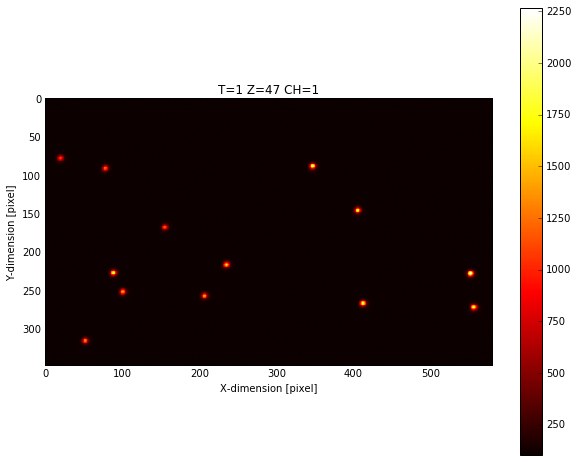

In [6]:
%matplotlib inline
img2show = zstack[zplane, channel, :, :]
fig1 = plt.figure(figsize=(10, 8), dpi=100)
ax1 = fig1.add_subplot(111)
cax = ax1.imshow(img2show, interpolation='nearest', cmap=cm.hot)
ax1.set_title('T=' + str(timepoint+1) + ' Z=' + str(zplane+1) + ' CH=' + str(channel+1), fontsize=12)
ax1.set_xlabel('X-dimension [pixel]', fontsize=10)
ax1.set_ylabel('Y-dimension [pixel]', fontsize=10)
cbar = fig1.colorbar(cax)
ax1.format_coord = bf.Formatter(cax)